# Machine Learning and Statistics Assignment
***
## Paired samples t-test.


### Objectives of this notebook:
1. Show how scipy.stats can be used to perform a paired samples t-test.
2. Find an appropriate data set online or elsewhere on which to perform a paired samples t-test.
3. Demonstrate how to perform a t-test on the data set.

## Introduction
***
`scipy.stats` is the SciPy sub-package which is mainly used for probabilistic distributions and statistical operations. SciPy stands for Scientific Python it is a very powerful open-source library and it's being used to perform  mathematical, scientific and engineering computations. It is build upon `NumPy` library and was created by the same person who created NumPy - Travis Olliphant with help from the open source community. 

Scipy.stats "*contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more."* [1]

### T-test

<p><img src="https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg" alt="William Sealy Gosset.jpg" style="float: right;" height="600" width="250"><br></p>

"*A t-test is a type of statistical analysis used to compare the averages of two groups and determine if the differences between them are more likely to arise from random chance."* [2] 

It was developed by William Sealy Gosset in 1908 as Student’s t-test. He published his work under the pseudonym “Student”. The purpose of the test is to compare the means of one or two related or unrelated sample groups. A t-test may be used to evaluate whether
- a single group differs from a known value (a one-sample t-test), 
- two groups differ from each other (an independent two-sample t-test), 
- there is a significant difference in paired measurements (a paired, or dependent samples t-test). [3]

If more than two groups need to be compared, multiple comparison method needs to be used such as ANOVA.

**t-Test assumptions**

- Data values are independent and continuous.
- Data has been randomly sampled from a population.
- There is homogeneity of variance (i.e., the variability of the data in each group is similar). Samples have almost equal standard deviation (applicable for a two-sample t-test)
- Data distribution is approximately normal. [4]

**Performing t-test**
1. State a hypothesis. A hypothesis is classified as a null hypothesis ($H_0$) and an alternative hypothesis ($Ha$) that rejects the null hypothesis.
2. Collect sample data.
3. Conduct the test.
4. Reject or fail to reject your null hypothesis $H_0$.

### Paired Sample T-Test
<p><img src="https://i0.wp.com/thedatascientist.com/wp-content/uploads/2022/06/paired-t-test.png?ssl=1" alt="T-test.png"  height="800" width="650"><br></p>
<p style="text-align: center;">Img taken from thedatascientist.com</p><br>

As mentioned above for the purposes of this assessment we are going to focus on **Paired Sample T-Test**
The paired sample t-test is also called dependent sample t-test. It’s an univariate test that tests for a significant difference between two related variables. 
It is used to compare two population means where you have two samples in which observations in one sample can be pared with observations in the over sample. An example of this is before and after observations on the same subject: 

- student's diagnostic test results before and after particular course, 
- comparing the average price of a product before and after a price change to measure the effect of the change on sales,
- before-and-after treatment measurements for a group of people.

### Hypotheses

1. Null hypotheses $H_0$: the true mean difference is equal to zero (between the observations). Meaning that if we run this test on a large number of samples from the population we would expect most of them to have mean paired differences close to zero (most samples would have small positive or negative differences between their values).

2. Alternative hypotheses $Ha$: the true mean difference is not equal to zero (two-tailed). This means an effect is observed— something has changed from one sample set to another or one group to another. [5]

Let's have a look at *t-statistics formula for Paired Sample T-Test*:


$$ t=  \frac{\bar x_d}{\frac{\bar s_d} {\sqrt{n}}} $$

T = (mean difference between pairs) / (standard deviation of differences / square root of sample size)
We can compute the p-value corresponding to the absolute value of the t-test statistics (|t|) for the degrees of freedom (df): df=n−1
If the p-value is inferior or equal to 0.05, we can conclude that the difference between the two paired samples are significantly different.

### Examples
***

Now let's have a look at some examples how to perform t-test. Our first dataset (taken from [here](https://github.com/Opensourcefordatascience/Data-sets/blob/master/blood_pressure.csv)) contains blood pressure readings before and after an intervention. These are variables “bp_before” and “bp_after”. 

To check how the data looks like we going to import pandas

In [1]:
import pandas as pd

# reading data from the file
df = pd.read_csv("data/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


Above, we can see the structure of the dataframe. Our dataset contains 120 observations and five variables (columns). Furthermore, there are two different datatypes in the dataframe - int64 and object. 
Here is how the top five rows from our table look:

In [2]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


As we are primarely interested in data from colums “bp_before” and “bp_after” for our analysis, let's group the together and get some descriptive statistics using the describe() method.

In [3]:
df[['bp_before','bp_after']].describe()


,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


Looks like the treatment has been succesfull as mean for blood presure after the treatment is lower the before.

<AxesSubplot:>

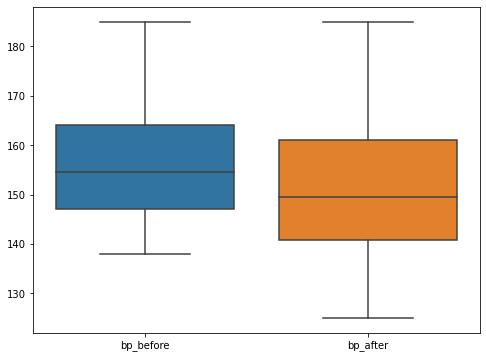

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

sns.boxplot(data=df[['bp_before','bp_after']])

<AxesSubplot:ylabel='Count'>

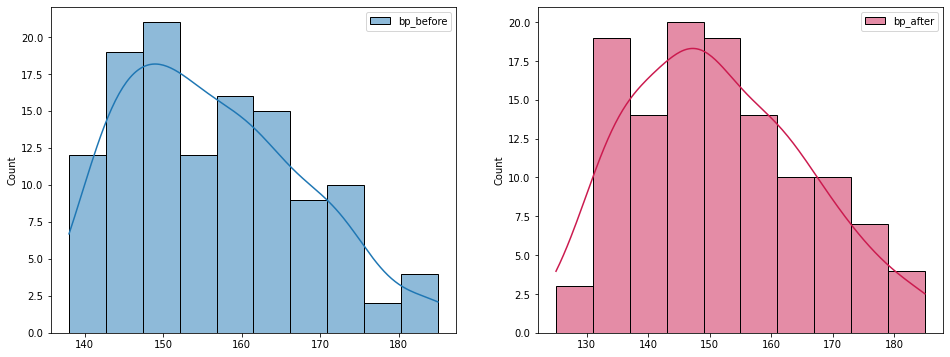

In [5]:
plt.rcParams["figure.figsize"] = (16,6)
fig, ax =plt.subplots(1,2)

sns.histplot(data=df[['bp_before']], bins=10, kde=True, ax=ax[0])
sns.histplot(data=df[['bp_after']], bins=10, palette="rocket", kde=True, ax=ax[1])


In [6]:
from scipy import stats
stats.shapiro(df['bp_before'])

ShapiroResult(statistic=0.9547787308692932, pvalue=0.0004928423441015184)

In [7]:
stats.shapiro(df['bp_after'])

ShapiroResult(statistic=0.9740639328956604, pvalue=0.020227791741490364)

## References

1. https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats <br>
2. https://en.wikipedia.org/wiki/Student%27s_t-test  <br>
3. https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test.html <br>
4. https://thedatascientist.com/how-to-do-a-t-test-in-python/ <br>
5. https://www.questionpro.com/blog/paired-samples/

## End